In [1]:
%matplotlib inline

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

import json
import glob
import os

In [2]:
base = "../exp/"
paths = glob.glob(base + "rphast_inc/*.json")
data = [json.load(open(path)) for path in paths]

In [3]:
queries = pd.DataFrame.from_records([{
    **progress,
    'algo': algo['algo'],
    'experiment': exp['experiment'],
    'ball_size_exp': exp['ball_size_exp'],
    'graph': { 'europe': 'DIMACs Europe', 'osm_ger': 'OSM Germany', 'osm_europe': 'OSM Europe' }[[x for x in run['args'][1].split('/') if x != ''][-1]],
    }
    for run in data for exp in run['experiments'] for algo in exp['algo_runs'] for progress in algo['progress_states']])

In [4]:
queries

,passed_time_mus,terminal_rank,algo,experiment,ball_size_exp,graph
0,56,0,lazy_rphast_many_to_one,lazy_rphast,14,OSM Germany
1,63,1,lazy_rphast_many_to_one,lazy_rphast,14,OSM Germany
2,86,2,lazy_rphast_many_to_one,lazy_rphast,14,OSM Germany
3,102,3,lazy_rphast_many_to_one,lazy_rphast,14,OSM Germany
4,116,4,lazy_rphast_many_to_one,lazy_rphast,14,OSM Germany
...,...,...,...,...,...,...
6599995,7969,10,lazy_rphast_cch_many_to_one,lazy_rphast,24,DIMACs Europe
6599996,12198,11,lazy_rphast_cch_many_to_one,lazy_rphast,24,DIMACs Europe
6599997,18637,12,lazy_rphast_cch_many_to_one,lazy_rphast,24,DIMACs Europe
6599998,28678,13,lazy_rphast_cch_many_to_one,lazy_rphast,24,DIMACs Europe


In [5]:
queries['single_query_time_mus'] = queries['passed_time_mus'] / (2 ** queries['terminal_rank'])
queries['terminal_idx'] = (2 ** queries['terminal_rank'])
queries['passed_time_ms'] = queries['passed_time_mus'] / 1000.0
queries['Algorithm'] = queries['algo'].map({ 'lazy_rphast_many_to_one': 'CH', 'lazy_rphast_cch_many_to_one': 'CCH' })
queries['Ball Size $|B|$'] = queries['ball_size_exp'].map('$2^{{{}}}$'.format)

In [6]:
queries['ball_size_exp'].unique()

array([14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])

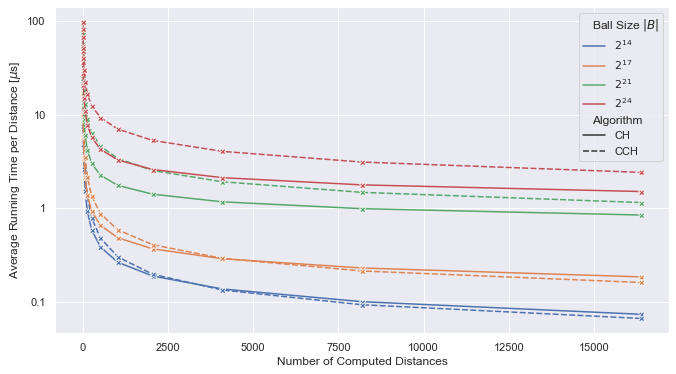

In [63]:
plt.figure(figsize=(11,6))
g = sns.lineplot(data=queries.query('graph == "OSM Germany" & ball_size_exp in [14,17,21,24]'), x='terminal_idx', y='single_query_time_mus', hue='Ball Size $|B|$', style='Algorithm', ci=None, marker='X')
g.set_yscale('log')
g.set_xlabel('Number of Computed Distances')
g.set_ylabel('Average Running Time per Distance [$\\mu$s]')
g.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda val, pos: f"{val if val < 1.0 else int(val)}"))

Text(0, 0.5, 'Running Time [ms]')

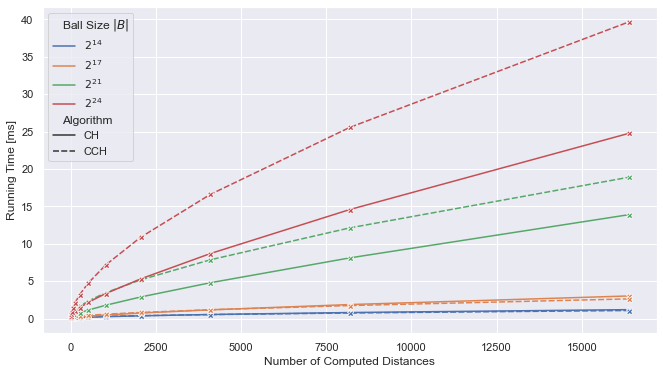

In [60]:
plt.figure(figsize=(11,6))
g = sns.lineplot(data=queries.query('graph == "OSM Germany" & ball_size_exp in [14,17,21,24]'), x='terminal_idx', y='passed_time_ms', hue='Ball Size $|B|$', style='Algorithm', ci=None, marker='X')
g.set_xlabel('Number of Computed Distances')
g.set_ylabel('Running Time [ms]')

# handles, _labels = g.get_legend_handles_labels()
# g.legend(handles, ['Ball Size $|B|$', '$2^{14}$', '$2^{17}$', '$2^{21}$', '$2^{24}$', 'Algorithm', 'CH', 'CCH'])

# t = g.get_legend().get_texts()[0]
# xfm = mpl.transforms.offset_copy(t.get_transform(), g.figure, x=-32, units="points")
# t.set_transform(xfm)
# t = g.get_legend().get_texts()[5]
# xfm = mpl.transforms.offset_copy(t.get_transform(), g.figure, x=-32, units="points")
# t.set_transform(xfm)
# g.get_legend().get_frame().get_width()

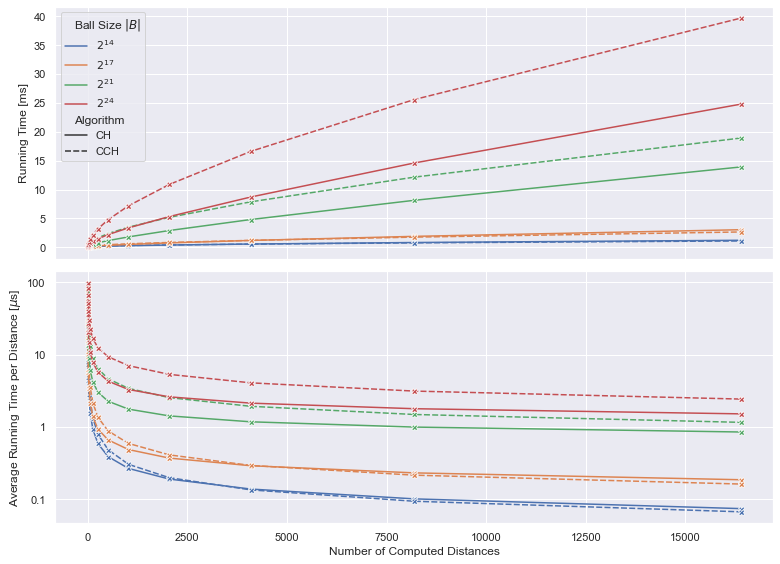

In [68]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(11,8))
g = sns.lineplot(data=queries.query('graph == "OSM Germany" & ball_size_exp in [14,17,21,24]'), x='terminal_idx', y='passed_time_ms', hue='Ball Size $|B|$', style='Algorithm', ci=None, marker='X', ax=ax1)
g.set_xlabel('Number of Computed Distances')
g.set_ylabel('Running Time [ms]')
g = sns.lineplot(data=queries.query('graph == "OSM Germany" & ball_size_exp in [14,17,21,24]'), x='terminal_idx', y='single_query_time_mus', hue='Ball Size $|B|$', style='Algorithm', ci=None, marker='X', ax=ax2, legend=False)
g.set_yscale('log')
g.set_xlabel('Number of Computed Distances')
g.set_ylabel('Average Running Time per Distance [$\\mu$s]')
g.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda val, pos: f"{val if val < 1.0 else int(val)}"))
fig.tight_layout()